In [1]:
import numpy as np
import os
import shutil
import time
import global_params
import cat_params
from image_functions import read_images, show_images, save_images
import bit_functions as bf

# **Read plain images**

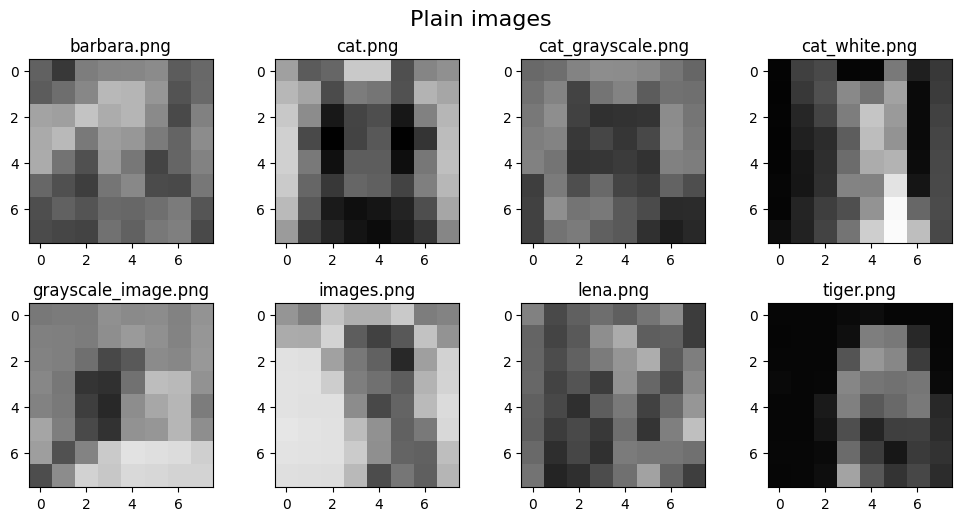

In [2]:
list_os = ['Windows', 'Linux']
OS = list_os[0]
path = 'C:\\Users\\HH\\Documents\\DICOM\\MIE_Cryptography\\' if OS == 'Windows' else '/home/anhpq0/MIE_Cryptography/'
dir_plain = path + 'plain_images'

R_iterations = 5
kI, str_Fnames = read_images(dir_plain, size = (global_params.M, global_params.N), OS = OS)
show_images(kI = kI, suptitle = 'Plain images', str_Fnames = str_Fnames, size = (10, 10), rows = 4, cols = 4)

# Destination folder
dir_cipher = path + 'cipher_images' + global_params.NamePCM

# Decrypted images folder
dir_decrypted = path + 'decrypted' + global_params.NamePCM

if (os.path.exists(dir_cipher)):
    shutil.rmtree(dir_cipher)
os.mkdir(dir_cipher)

if (os.path.exists(dir_decrypted)):
    shutil.rmtree(dir_decrypted)
os.mkdir(dir_decrypted)

# **Parameters**

In [3]:
# kC
kC = kI.copy()
# for k in range(global_params.K):
#     for i in range(global_params.N):
#         for j in range(global_params.M):
#             kC[k][i][j] = global_params.fl2fx(kI[k][i][j])

#kC-
kC_minus = np.copy(global_params.kC0)

#kP+
kP_plus = np.copy(global_params.kP0)
for k in range(global_params.K):
    kP_plus[k] = kC[k][0][1]

In [4]:
# Rules of bit arrangement (list of numpy arrays)
Yp_MN = cat_params.Yp_256x256_Cat if global_params.M == 10 else cat_params.Yp_8x8_Cat

# **Encryption**

In [5]:
print("=============================START ENCRYPTION PROCESSING=============================")
for n in range(global_params.Ne):
    start_time = time.time() # Record start time in seconds unit
    print("\n")
    print("\t---------------------------------------------------------")
    print("\t-------------------|      STEP ",n,"   |-------------------")
    print("\t---------------------------------------------------------\n")
    for i in range(global_params.M):
        for j in range(global_params.N):
            print("\n------------------------")
            print("|    Pixel ["+ str(i)+ "], [" + str(j) + "]    |")
            print("------------------------")
            E = bf.MIE_Bit_Manipulation(kC          = kC_minus,
                                        kP          = kP_plus,
                                        output_size = cat_params.k1_cat)
            print("\n1. E: \n", E, "\n")

            X_R = bf.PCM_Cat(E           = E,
                             Y1_FAST_Cat = cat_params.Y1_FAST_Cat,
                             Y2_FAST_Cat = cat_params.Y2_FAST_Cat,
                             Y3_FAST_Cat = cat_params.Y3_FAST_Cat,
                             Y4_FAST_Cat = cat_params.Y4_FAST_Cat,
                             R           = R_iterations)
            print("2. X_R: \n", X_R, "\n")

            XY_new, pseudoVal_string_C, pseudoVal_string_Cx = bf.MIE_FAST_XYnew_pseudoVal(Xn               = X_R, 
                                                                                          XY               = [i, j], 
                                                                                          Yp_MN            = Yp_MN, 
                                                                                          Y_inter_images_p = cat_params.Y_inter_images_p8_Cat, 
                                                                                          Yd_C             = cat_params.Yd_C_Cat, 
                                                                                          Yd_Cx            = cat_params.Yd_Cx_Cat)
            print("3. XY_new: \n", XY_new, "\n")
            print("4. pseudoVal_string_C: \n", pseudoVal_string_C, "\n")
            print("5. pseudoVal_string_Cx: \n", pseudoVal_string_Cx, "\n")

            kC_minus, kP_plus, kC = bf.MIE_FAST_Perm_and_Diff_pixels_ENC(kI                  = kC,
                                                                         XY                  = [i, j],
                                                                         XY_new              = XY_new,
                                                                         pseudoVal_string_C  = pseudoVal_string_C,
                                                                         pseudoVal_string_Cx = pseudoVal_string_Cx,
                                                                         kC_minus            = kC_minus,
                                                                         n                   = n)
            print("\n6. kC_minus: \n", kC_minus)
            print("7. kP_plus: \n", kP_plus)
            print("8. kC: \n", kC)

    end_time = time.time() # Record end time in senconds unit
    print("Simulation time of step ", n, ": ", end_time - start_time)

save_images(kC, dir_cipher, str_Fnames)

=============================START ENCRYPTION PROCESSING=============================


	---------------------------------------------------------
	-------------------|      STEP  0    |-------------------
	---------------------------------------------------------


------------------------
|    Pixel [0], [0]    |
------------------------

1. E: 
 111111000101011001000101010110111101111101110101100100010101011101101011001101101010110100110111011100000000101110111011111111010001111 

2. X_R: 
 [[fxp-u33/32(0.7706867393571883)]
 [fxp-u33/32(0.12974369735457003)]] 

3. XY_new: 
 [[5, 2, 0], [5, 2, 0], [5, 2, 0], [5, 2, 0], [5, 2, 0], [5, 2, 0], [5, 2, 0], [5, 2, 0]] 

4. pseudoVal_string_C: 
 ['01111000', '01111000', '01111000', '01111000', '01111000', '01111000', '01111000', '01111000'] 

5. pseudoVal_string_Cx: 
 ['10100000', '10100000', '10100000', '10100000', '10100000', '10100000', '10100000', '10100000'] 


6. kC_minus: 
 [[ 61]
 [177]
 [ 99]
 [234]
 [253]
 [115]
 [ 44]
 [102]]
7. 

# **Read cipher image**

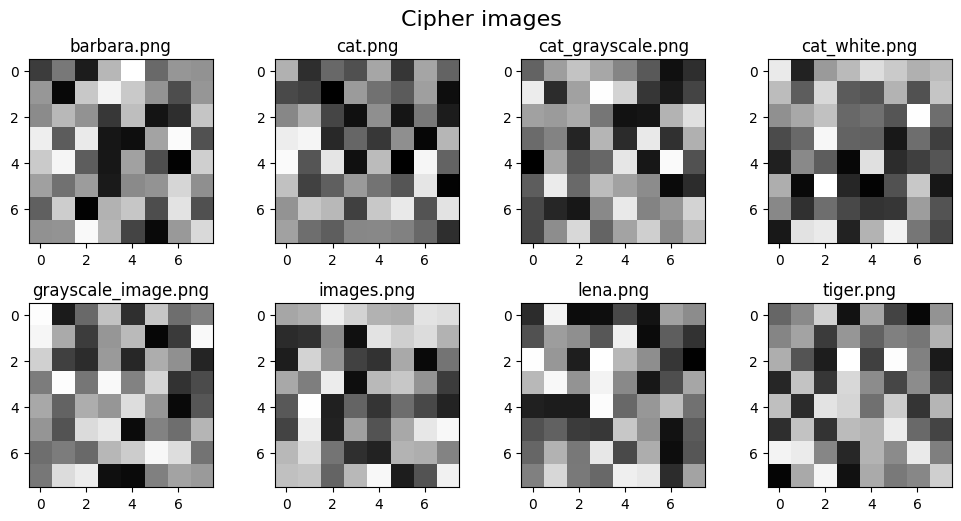

In [6]:
kI_cipher, str_Fnames_cipher = read_images(dir_cipher, size = (global_params.M, global_params.N), OS = OS)
show_images(kI = kI_cipher, suptitle = 'Cipher images', str_Fnames = str_Fnames_cipher, size = (10, 10), rows = 4, cols = 4)

# kC_cipher
kC_cipher = kI_cipher.copy()

#kC_cipher-
kC_cipher_minus = np.copy(global_params.kC0)
for k in range(global_params.K):
    kC_cipher_minus[k] = kC_cipher[k][global_params.M-1][global_params.N-2]

#kP_cipher+
kP_cipher_plus = np.copy(global_params.kP0)

# **Decryption**

=============================START DECRYPTION PROCESSING=============================


	---------------------------------------------------------
	-------------------|      STEP  0    |-------------------
	---------------------------------------------------------

------------------------
|    Pixel [7], [7]    |
------------------------

1. E: 
 110000011000101011110010111011000111101101111100111111101011010101001111000111111101100100010111010011000110000101111010101101010110000 

2. X_R: 
 [[fxp-u33/32(0.33236302086152136)]
 [fxp-u33/32(0.03899731207638979)]] 

3. XY_new: 
 [[3, 3, 6], [3, 3, 6], [3, 3, 6], [3, 3, 6], [3, 3, 6], [3, 3, 6], [3, 3, 6], [3, 3, 6]] 

4. pseudoVal_string_C: 
 ['10101110', '10101110', '10101110', '10101110', '10101110', '10101110', '10101110', '10101110'] 

5. pseudoVal_string_Cx: 
 ['11011000', '11011000', '11011000', '11011000', '11011000', '11011000', '11011000', '11011000'] 


6. kC_cipher_minus: 
 [[  9]
 [129]
 [207]
 [242]
 [128]
 [ 29]
 [232]
 [12

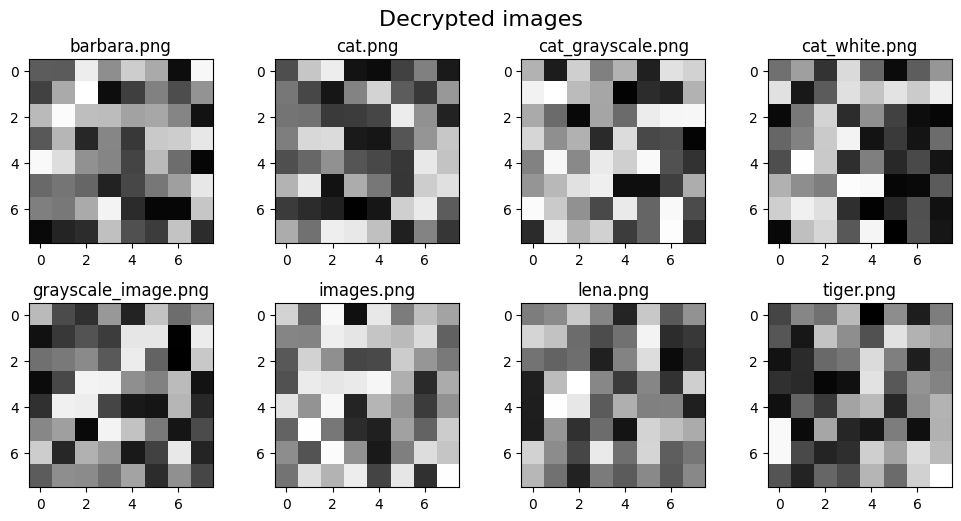

In [7]:
print("=============================START DECRYPTION PROCESSING=============================")
for n in range(global_params.Ne - 1, -1, -1):
    start_time = time.time() # Record start time in seconds unit
    print("\n")
    print("\t---------------------------------------------------------")
    print("\t-------------------|      STEP ",n,"   |-------------------")
    print("\t---------------------------------------------------------\n")
    for i in range(global_params.M - 1, -1, -1):
        for j in range(global_params.N - 1, -1, -1):
            print("------------------------")
            print("|    Pixel ["+ str(i)+ "], [" + str(j) + "]    |")
            print("------------------------")
            E = bf.MIE_Bit_Manipulation(kC          = kC_cipher_minus, 
                                        kP          = kP_cipher_plus,
                                        output_size = cat_params.k1_cat)
            print("\n1. E: \n", E, "\n")

            X_R = bf.PCM_Cat(E           = E,
                             Y1_FAST_Cat = cat_params.Y1_FAST_Cat,
                             Y2_FAST_Cat = cat_params.Y2_FAST_Cat,
                             Y3_FAST_Cat = cat_params.Y3_FAST_Cat,
                             Y4_FAST_Cat = cat_params.Y4_FAST_Cat,
                             R           = R_iterations)
            print("2. X_R: \n", X_R, "\n")

            XY_new, pseudoVal_string_C, pseudoVal_string_Cx = bf.MIE_FAST_XYnew_pseudoVal (Xn               = X_R, 
                                                                                           XY               = [i, j], 
                                                                                           Yp_MN            = Yp_MN,
                                                                                           Y_inter_images_p = cat_params.Y_inter_images_p8_Cat,
                                                                                           Yd_C             = cat_params.Yd_C_Cat,
                                                                                           Yd_Cx            = cat_params.Yd_Cx_Cat)
            print("3. XY_new: \n", XY_new, "\n")
            print("4. pseudoVal_string_C: \n", pseudoVal_string_C, "\n")
            print("5. pseudoVal_string_Cx: \n", pseudoVal_string_Cx, "\n")

            kC_cipher_minus, kP_cipher_plus, kC_cipher = bf.MIE_FAST_Perm_and_Diff_pixels_DEC (kC                  = kC_cipher,
                                                                                               XY                  = [i, j],
                                                                                               XY_new              = XY_new,
                                                                                               pseudoVal_string_C  = pseudoVal_string_C,
                                                                                               pseudoVal_string_Cx = pseudoVal_string_Cx,
                                                                                               kC_minus            = kC_cipher_minus,
                                                                                               n                   = n)
            print("\n6. kC_cipher_minus: \n", kC_cipher_minus, "\n")
            print("7. kP_cipher_plus: \n", kP_cipher_plus, "\n")
            print("8. kC_cipher: \n", kC_cipher, "\n")

    end_time = time.time() # Record end time in senconds unit
    print("Simulation time of step ", n, ": ", end_time - start_time)

save_images(kC_cipher, dir_decrypted, str_Fnames_cipher)
show_images(kI = kC_cipher, suptitle = 'Decrypted images', str_Fnames = str_Fnames_cipher, size = (10, 10), rows = 4, cols = 4)

In [8]:
from fxpmath import Fxp
x = Fxp(1.0, False, 3, 0)
print(x == 1)

True
